In [3]:
%cd ..

c:\Code\Armband


In [4]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pickle
from utils.visualize import showHistory

results = pickle.load(open('train_results.pkl', 'rb'))

    

conv
Accuracy: [0.86846154 0.86653846 0.89       0.8725    ]
conv_gru
Accuracy: [0.90980769 0.92730769 0.9525     0.92      ]
conv_lstm
Accuracy: [0.94826923 0.93480769 0.97       0.945     ]
conv_rnn
Accuracy: [0.96769231 0.94769231 0.9625     0.89      ]
dense
Accuracy: [0.86307692 0.93903846 0.6575     0.8275    ]
gru
Accuracy: [0.55673077 0.87       0.4975     0.8625    ]
lstm
Accuracy: [0.60423077 0.87192308 0.555      0.86      ]
rnn
Accuracy: [0.88711538 0.92730769 0.5225     0.72      ]


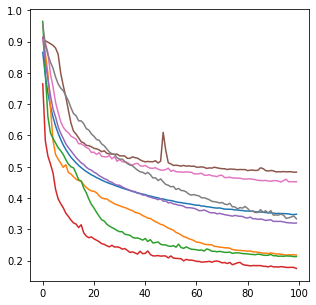

In [5]:
plt.rcParams["figure.figsize"] = [5, 5]
with plt.rc_context({'figure.facecolor':'white'}):
    for result in results:
        model_desc = result['model_descr']
        acc = result['acc']
        history = result['history']
        print(model_desc)
        print(f'Accuracy: {acc}')
        #print(history.keys())
        plt.plot(history['loss'])
    plt.show()
 

In [8]:
keys= results[0]['history'].keys()
keys

dict_keys(['loss', 'distance_loss', 'degree_loss', 'distance_mae', 'degree_mae', 'val_loss', 'val_distance_loss', 'val_degree_loss', 'val_distance_mae', 'val_degree_mae'])

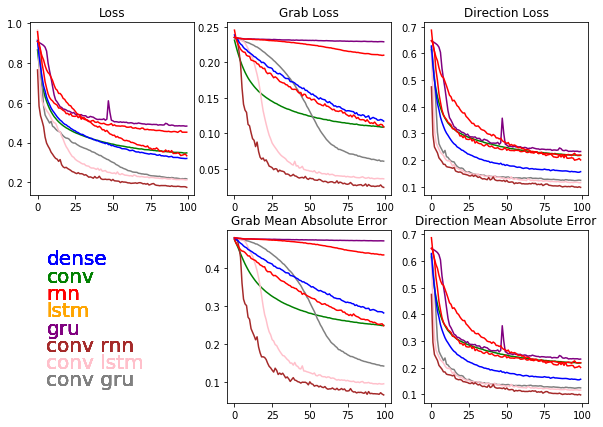

In [16]:
import matplotlib as mpl

plt.figure.dpi = 1000
plt.rcParams["figure.figsize"] = [10, 7]

colors = {"dense":"blue", "conv":"green","rnn":"red","lstm":"red", "gru":"purple","conv_rnn":"brown","conv_lstm":"pink", "conv_gru":"gray"}

with plt.rc_context({'figure.facecolor':'white'}):
    plt.size = (10,10)
    fig, axs = plt.subplots(2, 3)
    for result in results:

        history = result['history']
        axs[0, 0].plot(history['loss'], color=colors[result['model_descr']])
        axs[0, 0].set_title('Loss')
        axs[0, 1].plot(history['distance_loss'], color=colors[result['model_descr']])
        axs[0, 1].set_title('Grab Loss')
        axs[0, 2].plot(history['degree_loss'], color=colors[result['model_descr']])
        axs[0, 2].set_title('Direction Loss')

        axs[1, 0].axis('off')
        
        axs[1, 0].text(0.1, 0.8, "dense", fontsize = 20,  color = 'blue')
        axs[1, 0].text(0.1, 0.7, "conv",  fontsize = 20,color = 'green')
        axs[1, 0].text(0.1, 0.6, "rnn",  fontsize = 20,color = 'red')
        axs[1, 0].text(0.1, 0.5, "lstm",  fontsize = 20,color = 'orange')
        axs[1, 0].text(0.1, 0.4, "gru",  fontsize = 20,color = 'purple')
        axs[1, 0].text(0.1, 0.3, "conv rnn",  fontsize = 20,color = 'brown')
        axs[1, 0].text(0.1, 0.2, "conv lstm",  fontsize = 20,color = 'pink')
        axs[1, 0].text(0.1, 0.1, "conv gru",  fontsize = 20,color = 'gray')



        axs[1, 1].plot(history['distance_mae'], color=colors[result['model_descr']])
        axs[1, 1].set_title('Grab Mean Absolute Error')
        axs[1, 2].plot(history['degree_mae'], color=colors[result['model_descr']])
        axs[1, 2].set_title('Direction Mean Absolute Error')
plt.savefig('train_results.png')

    

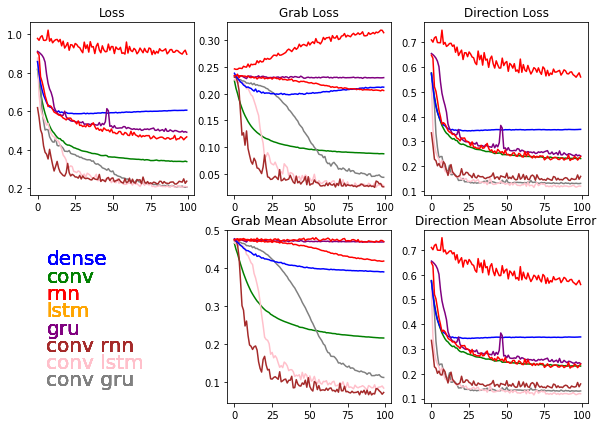

In [15]:
import matplotlib as mpl

plt.figure.dpi = 1000
plt.rcParams["figure.figsize"] = [10, 7]

colors = {"dense":"blue", "conv":"green","rnn":"red","lstm":"red", "gru":"purple","conv_rnn":"brown","conv_lstm":"pink", "conv_gru":"gray"}

with plt.rc_context({'figure.facecolor':'white'}):
    plt.size = (10,10)
    fig, axs = plt.subplots(2, 3)
    for result in results:

        history = result['history']
        axs[0, 0].plot(history['val_loss'], color=colors[result['model_descr']])
        axs[0, 0].set_title('Loss')
        axs[0, 1].plot(history['val_distance_loss'], color=colors[result['model_descr']])
        axs[0, 1].set_title('Grab Loss')
        axs[0, 2].plot(history['val_degree_loss'], color=colors[result['model_descr']])
        axs[0, 2].set_title('Direction Loss')

        axs[1, 0].axis('off')
        
        axs[1, 0].text(0.1, 0.8, "dense", fontsize = 20,  color = 'blue')
        axs[1, 0].text(0.1, 0.7, "conv",  fontsize = 20,color = 'green')
        axs[1, 0].text(0.1, 0.6, "rnn",  fontsize = 20,color = 'red')
        axs[1, 0].text(0.1, 0.5, "lstm",  fontsize = 20,color = 'orange')
        axs[1, 0].text(0.1, 0.4, "gru",  fontsize = 20,color = 'purple')
        axs[1, 0].text(0.1, 0.3, "conv rnn",  fontsize = 20,color = 'brown')
        axs[1, 0].text(0.1, 0.2, "conv lstm",  fontsize = 20,color = 'pink')
        axs[1, 0].text(0.1, 0.1, "conv gru",  fontsize = 20,color = 'gray')



        axs[1, 1].plot(history['val_distance_mae'], color=colors[result['model_descr']])
        axs[1, 1].set_title('Grab Mean Absolute Error')
        axs[1, 2].plot(history['val_degree_mae'], color=colors[result['model_descr']])
        axs[1, 2].set_title('Direction Mean Absolute Error')
plt.savefig('val_results.png')
            

    

In [39]:
for result in results:
    model_desc = result['model_descr']
    res = result["acc"]
    res = np.array(res)
    res*=100
    res = res.astype(int)
    formated_results = f'Train grab acc: {res[0]}%, Train direction acc: {res[1]}%, Test grab acc: {res[2]}%, Test direction acc: {res[3]}%'
    print(f'Model:{model_desc}: {formated_results}')
 

Model:conv: Train grab acc: 86%, Train direction acc: 86%, Test grab acc: 89%, Test direction acc: 87%
Model:conv_gru: Train grab acc: 90%, Train direction acc: 92%, Test grab acc: 95%, Test direction acc: 92%
Model:conv_lstm: Train grab acc: 94%, Train direction acc: 93%, Test grab acc: 97%, Test direction acc: 94%
Model:conv_rnn: Train grab acc: 96%, Train direction acc: 94%, Test grab acc: 96%, Test direction acc: 89%
Model:dense: Train grab acc: 86%, Train direction acc: 93%, Test grab acc: 65%, Test direction acc: 82%
Model:gru: Train grab acc: 55%, Train direction acc: 87%, Test grab acc: 49%, Test direction acc: 86%
Model:lstm: Train grab acc: 60%, Train direction acc: 87%, Test grab acc: 55%, Test direction acc: 86%
Model:rnn: Train grab acc: 88%, Train direction acc: 92%, Test grab acc: 52%, Test direction acc: 72%
